In [ ]:
import pandas as pd
path = "https://github.com/alexesc/data/raw/main/pollutants.xlsx"
sheet_name = "Sheet1"
pollutants = pd.read_excel(path, sheet_name, engine='openpyxl')
pollutants

,Hour,time,flow,rainfall,nh3o,no2o,no3o,po,sso,tsso,flow_interp,rainfall_interp,nh3_interp,no2_interp,no3_interp,p_interp,ss_interp,tss_interp,Unnamed: 18
0,0.25,00:00:00,0.034,2.08,0.00,0.0000,0.0000,0.0000,0.000,0.00,0.034,2.08,0.0,0.0000,0.000000,0.0000,0.000,0.000000,0.0625
1,0.50,00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.294,2.08,0.5,0.1875,2.062500,0.1875,3.125,32.000000,0.1250
2,0.75,00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.554,2.08,1.0,0.3750,4.125000,0.3750,6.250,64.000000,0.1875
3,1.00,00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814,2.08,1.5,0.5625,6.187500,0.5625,9.375,96.000000,0.2500
4,1.25,01:00:00,1.074,2.08,1.82,0.6825,7.5075,0.6825,11.375,116.48,1.074,2.08,2.0,0.7500,8.250000,0.7500,12.500,128.000000,0.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,23.25,23:00:00,1.100,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.100,0.00,0.0,0.0000,1.333333,0.0000,4.000,32.333333,5.8125
93,23.50,23:15:00,NaN,NaN,0.00,0.0000,1.1200,0.0000,3.360,27.16,0.900,0.00,0.0,0.0000,1.000000,0.0000,3.000,24.250000,5.8750
94,23.75,23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700,0.00,0.0,0.0000,0.666667,0.0000,2.000,16.166667,5.9375
95,24.00,23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500,0.00,0.0,0.0000,0.333333,0.0000,1.000,8.083333,6.0000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

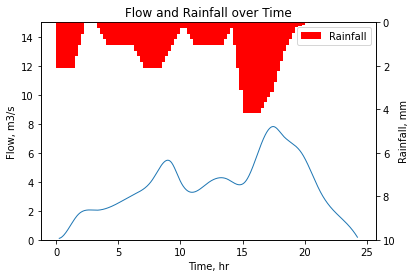

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

# Assume that you have a pandas DataFrame with columns 'time', 'flow', and 'rainfall'
df = pollutants

# Extract the 'time' and 'flow' columns as numpy arrays
x = df['Hour'].to_numpy()
y = df['flow_interp'].to_numpy()

# Fit a smooth spline to the data
spline = UnivariateSpline(x, y, s=1)

# Generate smooth data using the spline
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Plot the smooth data
plt.plot(x_smooth, y_smooth, '-', linewidth=1, label='Flow')

# Create a line plot with smooth lines
#plt.plot(df['Count'], df['flow_interp'], '-', linewidth=1, label='Flow')

# Create a separate Axes object for the rainfall data
axes = plt.gca()
axes2 = axes.twinx()

# axes.plot(df['Count'], df['flow_interp'], '-', linewidth=1, color='b', label='Flow')

# Plot the rainfall data on the second Axes object
#axes2.plot(df['Count'], df['rainfall_interp'], '-o', linewidth=1, color='r', label='Rainfall')

# Create a column plot for the rainfall data
axes2.bar(df['Hour'], df['rainfall_interp'], width=0.5, color='r', label='Rainfall')

# Invert the y-axis for the rainfall data only
axes2.invert_yaxis()

# Set the y-axis limits for the second Axes object
axes.set_ylim([0, 15])
axes2.set_ylim([10, 0])

# Add axis labels and a title
axes.set_xlabel('Time, hr')

axes.set_ylabel('Flow, m3/s')
axes2.set_ylabel('Rainfall, mm')
plt.title('Flow and Rainfall over Time')

# Add the legend
plt.legend()

# Show the plot
# plt.show()
# Save the plot as an image with a high DPI
plt.savefig('flow.tiff', dpi=1200)
from google.colab import files
files.download('flow.jpg')
# Display the saved image
# Image(filename='flow.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

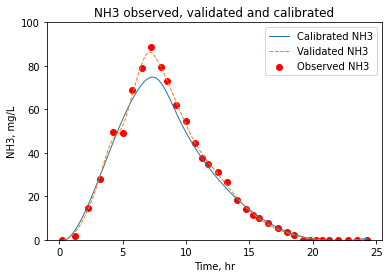

In [ ]:
import numpy as np

y = df['nh3_interp'].to_numpy()

# Fit a smooth spline to the data
spline = UnivariateSpline(x, y, s=100)

# Generate smooth data using the spline
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Plot the smooth data
plt.plot(x_smooth, y_smooth, '-', linewidth=1, label='Calibrated NH3')

# Create a line plot with smooth lines
#plt.plot(df['Count'], df['flow_interp'], '-', linewidth=1, label='Flow')

# Plot the scatter data for the nh3o parameter
plt.scatter(df['Hour'], df['nh3o'], marker='o', color='r', label='Observed NH3')

df['nh3oo'] = df['nh3o'].interpolate()
y1 = df['nh3oo'].to_numpy()
spline = UnivariateSpline(x, y1, s=100)
y1_smooth = spline(x_smooth)
# Plot the smooth data
plt.plot(x_smooth, y1_smooth, '--', linewidth=1, label='Validated NH3')

# Set the y-axis limits for the second Axes object
plt.ylim([0, 100])  

# Add axis labels and a title
plt.xlabel('Time, hr')
plt.ylabel('NH3, mg/L')
plt.title('NH3 observed, validated and calibrated')

# Add the legend
plt.legend()

# Show the plot
# plt.show()
plt.savefig('nh3.jpg', dpi=1200)
from google.colab import files
files.download('nh3.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

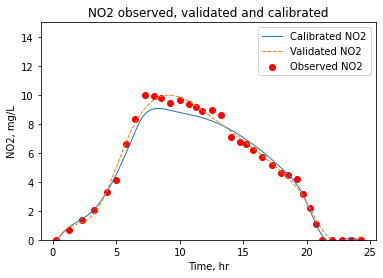

In [ ]:
y = df['no2_interp'].to_numpy()

# Fit a smooth spline to the data
spline = UnivariateSpline(x, y, s=1)

# Generate smooth data using the spline
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Plot the smooth data
plt.plot(x_smooth, y_smooth, '-', linewidth=1, label='Calibrated NO2')

# Create a line plot with smooth lines
#plt.plot(df['Count'], df['flow_interp'], '-', linewidth=1, label='Flow')

# Plot the scatter data for the nh3o parameter
plt.scatter(df['Hour'], df['no2o'], marker='o', color='r', label='Observed NO2')

df['no2oo'] = df['no2o'].interpolate()
y1 = df['no2oo'].to_numpy()
spline = UnivariateSpline(x, y1, s=10)
y1_smooth = spline(x_smooth)
# Plot the smooth data
plt.plot(x_smooth, y1_smooth, '--', linewidth=1, label='Validated NO2')

# Set the y-axis limits for the second Axes object
plt.ylim([0, 15])  

# Add axis labels and a title
plt.xlabel('Time, hr')
plt.ylabel('NO2, mg/L')
plt.title('NO2 observed, validated and calibrated')

# Add the legend
plt.legend()

# Show the plot
# plt.show()
plt.savefig('no2.jpg', dpi=1200)
from google.colab import files
files.download('no2.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

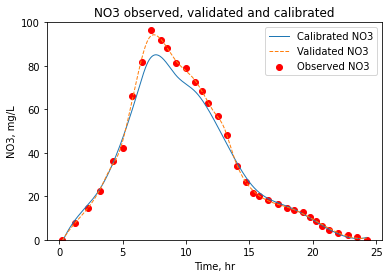

In [ ]:
y = df['no3_interp'].to_numpy()

# Fit a smooth spline to the data
spline = UnivariateSpline(x, y, s=50)

# Generate smooth data using the spline
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Plot the smooth data
plt.plot(x_smooth, y_smooth, '-', linewidth=1, label='Calibrated NO3')

# Create a line plot with smooth lines
#plt.plot(df['Count'], df['flow_interp'], '-', linewidth=1, label='Flow')

# Plot the scatter data for the nh3o parameter
plt.scatter(df['Hour'], df['no3o'], marker='o', color='r', label='Observed NO3')

df['no3oo'] = df['no3o'].interpolate()
y1 = df['no3oo'].to_numpy()
spline = UnivariateSpline(x, y1, s=50)
y1_smooth = spline(x_smooth)
# Plot the smooth data
plt.plot(x_smooth, y1_smooth, '--', linewidth=1, label='Validated NO3')

# Set the y-axis limits for the second Axes object
plt.ylim([0, 100])  

# Add axis labels and a title
plt.xlabel('Time, hr')
plt.ylabel('NO3, mg/L')
plt.title('NO3 observed, validated and calibrated')

# Add the legend
plt.legend()

# Show the plot
# plt.show()
plt.savefig('no3.jpg', dpi=1200)
from google.colab import files
files.download('no3.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

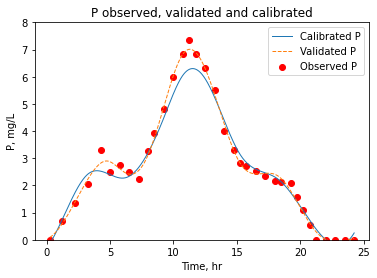

In [ ]:
y = df['p_interp'].to_numpy()

# Fit a smooth spline to the data
spline = UnivariateSpline(x, y, s=5)

# Generate smooth data using the spline
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Plot the smooth data
plt.plot(x_smooth, y_smooth, '-', linewidth=1, label='Calibrated P')

# Create a line plot with smooth lines
#plt.plot(df['Count'], df['flow_interp'], '-', linewidth=1, label='Flow')

# Plot the scatter data for the nh3o parameter
plt.scatter(df['Hour'], df['po'], marker='o', color='r', label='Observed P')

df['poo'] = df['po'].interpolate()
y1 = df['poo'].to_numpy()
spline = UnivariateSpline(x, y1, s=2)
y1_smooth = spline(x_smooth)
# Plot the smooth data
plt.plot(x_smooth, y1_smooth, '--', linewidth=1, label='Validated P')

# Set the y-axis limits for the second Axes object
plt.ylim([0, 8])  

# Add axis labels and a title
plt.xlabel('Time, hr')
plt.ylabel('P, mg/L')
plt.title('P observed, validated and calibrated')

# Add the legend
plt.legend()

# Show the plot
# plt.show()
plt.savefig('p.jpg', dpi=1200)
from google.colab import files
files.download('p.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

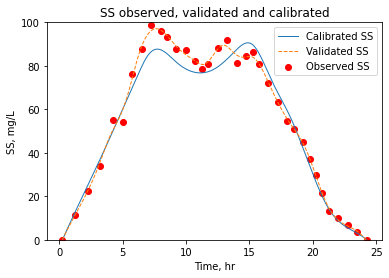

In [ ]:
y = df['ss_interp'].to_numpy()

# Fit a smooth spline to the data
spline = UnivariateSpline(x, y, s=50)

# Generate smooth data using the spline
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Plot the smooth data
plt.plot(x_smooth, y_smooth, '-', linewidth=1, label='Calibrated SS')

# Create a line plot with smooth lines
#plt.plot(df['Count'], df['flow_interp'], '-', linewidth=1, label='Flow')

# Plot the scatter data for the nh3o parameter
plt.scatter(df['Hour'], df['sso'], marker='o', color='r', label='Observed SS')

df['ssoo'] = df['sso'].interpolate()
y1 = df['ssoo'].to_numpy()
spline = UnivariateSpline(x, y1, s=150)
y1_smooth = spline(x_smooth)
# Plot the smooth data
plt.plot(x_smooth, y1_smooth, '--', linewidth=1, label='Validated SS')

# Set the y-axis limits for the second Axes object
plt.ylim([0, 100])  

# Add axis labels and a title
plt.xlabel('Time, hr')
plt.ylabel('SS, mg/L')
plt.title('SS observed, validated and calibrated')

# Add the legend
plt.legend()

# Show the plot
# plt.show()
plt.savefig('ss.jpg', dpi=1200)
from google.colab import files
files.download('ss.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

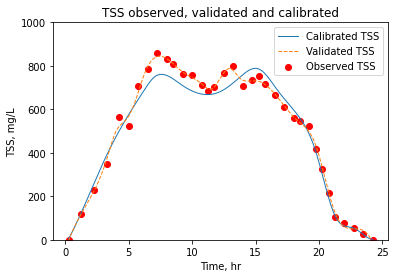

In [ ]:
y = df['tss_interp'].to_numpy()

# Fit a smooth spline to the data
spline = UnivariateSpline(x, y, s=3000)

# Generate smooth data using the spline
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Plot the smooth data
plt.plot(x_smooth, y_smooth, '-', linewidth=1, label='Calibrated TSS')

# Create a line plot with smooth lines
#plt.plot(df['Count'], df['flow_interp'], '-', linewidth=1, label='Flow')

# Plot the scatter data for the nh3o parameter
plt.scatter(df['Hour'], df['tsso'], marker='o', color='r', label='Observed TSS')

df['tssoo'] = df['tsso'].interpolate()
y1 = df['tssoo'].to_numpy()
spline = UnivariateSpline(x, y1, s=14350)
y1_smooth = spline(x_smooth)
# Plot the smooth data
plt.plot(x_smooth, y1_smooth, '--', linewidth=1, label='Validated TSS')

# Set the y-axis limits for the second Axes object
plt.ylim([0, 1000])  

# Add axis labels and a title
plt.xlabel('Time, hr')
plt.ylabel('TSS, mg/L')
plt.title('TSS observed, validated and calibrated')

# Add the legend
plt.legend()

# Show the plot
# plt.show()
plt.savefig('tss.jpg', dpi=1200)
from google.colab import files
files.download('tss.jpg')
